In [43]:
import pandas as pd
import numpy as np
import csv
from scipy.linalg import svd, sqrtm
import math
import sys
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from numpy.linalg import solve

#Constructing Ratings matrix

with open('/home/deepak/Documents/Maths for ML/ratings.csv') as File1:
    reader = csv.reader(File1, delimiter=',', quotechar=',', quoting=csv.QUOTE_MINIMAL)
    user_ID = []
    header = next(reader)
    for uid in reader:
        user_ID.append(uid)
        
with open('/home/deepak/Documents/Maths for ML/movies.csv') as File2:
    reader = csv.reader(File2, delimiter=',', quotechar=',', quoting=csv.QUOTE_MINIMAL)
    movie_ID = []
    header = next(reader)
    list_num = list(range(1,9743))
    for j in list_num:
        for i in reader:
            i.append(j)
            j+=1
            movie_ID.append(i)

movie_dict = {}
for i in movie_ID:
    movie_dict[i[0]] = i[-1]

mat_array = np.zeros((9742,610))

for i in range(len(user_ID)):
    mat_array[movie_dict[user_ID[i][1]]-1][int(user_ID[i][0])-1]=float(user_ID[i][2]) #final ratings matrix

In [ ]:

#Alternating Least Squares

def als(latent,other,ratings,lamda,type):
    if type == 'movie': #for movie latent vector
        
        lamda_I = np.eye(other.transpose().dot(other).shape[0])*lamda 

        for i in range(latent.shape[0]):
            latent[i, :] = solve(( other.transpose().dot(other) + lamda_I),ratings[i, :].dot(other))

    elif type == 'user': #for user latent vector
        
        lamda_I = np.eye(other.transpose().dot(other).shape[0])*lamda

        for j in range(latent.shape[0]):
            latent[j, :] = solve((other.transpose().dot(other) + lamda_I),ratings[:, j].dot(other))

    return latent

n_movies = 9762
n_factors = 610
n_users = 610
n_iter =  10
user_regf = 0.0
movie_regf = 0.0
movie_vec = np.random.rand(mat_array.shape[0],n_factors) 
users_vec = np.random.rand(n_users, mat_array.shape[1])
als_mat = np.zeros((mat_array.shape[0], mat_array.shape[1]))

for i in range(n_iter):
    movie_vec = als(movie_vec, users_vec, mat_array, movie_regf, type='movie')

    users_vec = als(users_vec, movie_vec, mat_array, user_regf, type = 'user')


for j in range(movie_vec.shape[0]):
    for k in range(users_vec.shape[0]):
        als_mat[j,k] = movie_vec[j,:].dot(users_vec[k,:].transpose())

print(als_mat)
print(movie_vec)
print(users_vec)

In [ ]:

#SVD Implementation

k_values = list(range(5,201,15))
def uSv(mat_array):
    RMSE_list = []
    
        
    for k in k_values:
        u,s,v = np.linalg.svd(mat_array, full_matrices=False)
        s = np.diag(s) #to make the 1D array into a square diagonal matrix for factorization
        s = s[0:k, 0:k] 
        u = u[:,0:k]
        v = v[0:k,:]
        
        s_root = sqrtm(s) #possible because matrix s is always non negative
        
        usk = np.dot(u,s_root)
        skv = np.dot(s_root,v)
        usv = np.dot(usk,skv)#simplified ratings matrix with usk=M and skv=U being the dense matrices
        
        error_mat = []
        
        for i in range(9742):
            for j in range(610):
                if mat_array[i][j]!= 0:
                    error_mat.append((mat_array[i][j] - usv[i][j])**2)
                    
        RMSE_list.append(math.sqrt(sum(error_mat)/100836))
    return RMSE_list

s = uSv(mat_array)
plt.plot(k_values,s)
plt.xlabel('K values')
plt.ylabel('RMSD')
plt.show()

In [ ]:

#NMF Implementaion

def nmf(V, R, threshold=0.001, n=100, W=None, H=None):

    if W is None: 
        W = np.random.rand(V.shape[0], R) #initialize a random matrix
    if H is None:
        H = np.random.rand(R, V.shape[1]) #initialize a random matrix

    niter = 0
    is_below_threshold = False 

    epsilon_value = sys.float_info.epsilon #system generated epsilon value
    while not is_below_threshold and niter <= n: #iteration conditions
        H_niter = H
        W_niter = W
        H = H * (W.transpose().dot(V) / (W.transpose().dot(W).dot(H) + epsilon_value))
        W = W * (V.dot(H.transpose()) / (W.dot(H).dot(H.transpose()) + epsilon_value))

        H_error = np.linalg.norm(H - H_niter, ord = 2) #norm of new and old H
        W_error = np.linalg.norm(W - W_niter, ord = 2) #norm of new and old W

        if H_error < threshold and W_error < threshold:
            is_below_threshold = True

        niter +=1
    
    V_approx = W.dot(H) #approximate value of V
    
    return W, H, V_approx

[NMF_W, NMF_H, NMF_V_approx] = nmf(mat_array,150)
print(NMF_W)
print(NMF_H)
print(NMF_V_approx)


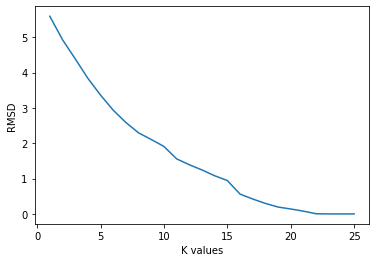

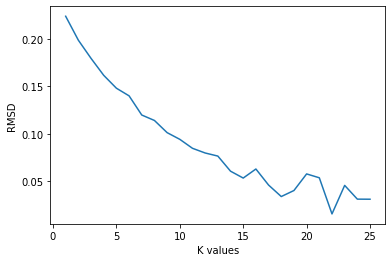

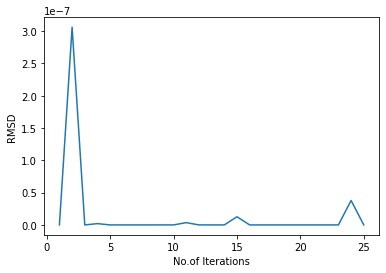

In [42]:
import pandas as pd
import numpy as np
import csv
from scipy.linalg import svd, sqrtm
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
import sys
from numpy.linalg import solve
import numpy as np
from scipy.sparse import random
from scipy import stats
from numpy.random import default_rng
rng = default_rng()
rvs = stats.poisson(10, loc=10).rvs
S = random(25,25,density = 0.1, random_state=rng, data_rvs=rvs)

#SVD

k_values = list(range(1,26,1))
def uSv(mat_array):
    RMSE_list = []
    
        
    for k in k_values:
        u,s,v = np.linalg.svd(mat_array, full_matrices=False)
        s = np.diag(s) #to make the 1D array into a square diagonal matrix for factorization
        s = s[0:k, 0:k] 
        u = u[:,0:k]
        v = v[0:k,:]
        
        s_root = sqrtm(s) #possible because matrix s is always non negative
        
        usk = np.dot(u,s_root)
        skv = np.dot(s_root,v)
        usv = np.dot(usk,skv)#simplified ratings matrix with usk=M and skv=U being the dense matrices
        
        error_mat = []
        
        for i in range(25):
            for j in range(25):
                if mat_array[i][j]!= 0:
                    error_mat.append((mat_array[i][j] - usv[i][j])**2)

        RMSE_list.append(math.sqrt(sum(error_mat)/625))
    return RMSE_list

s = uSv(S.A)

plt.plot(k_values,s)
plt.xlabel('K values')
plt.ylabel('RMSD')
plt.show()


#NMFusingEuclideandistance

def nmf(V, R, threshold=0.001, n=100, W=None, H=None):

    if W is None: 
        W = np.random.rand(V.shape[0], R) #initialize a random matrix
    if H is None:
        H = np.random.rand(R, V.shape[1]) #initialize a random matrix
    
    
    niter = 0
    is_below_threshold = False 

    epsilon_value = sys.float_info.epsilon #system generated epsilon value
    while not is_below_threshold and niter <= n: #iteration conditions
        H_niter = H
        W_niter = W
   
        H = H * (W.T.dot(V) / (W.T.dot(W).dot(H) + epsilon_value))
        W = W * (V.dot(H.T) / (W.dot(H).dot(H.T) + epsilon_value))

        H_error = np.linalg.norm(H - H_niter, ord = 2) #norm of new and old H
        W_error = np.linalg.norm(W - W_niter, ord = 2) #norm of new and old W

        if H_error < threshold and W_error < threshold:
            is_below_threshold = True

        niter +=1
    
    V_approx = W.dot(H) #approximate value of V
    
    return W, H, V_approx

rmse = []
for i in range(1,26,1):
    [NMF_W, NMF_H, NMF_V_approx] = nmf(S.A,i)
    error = []
    for j in range(25):
        for k in range(25):
            if S.A[j][k]!= 0:
                error.append((NMF_V_approx[j][k] - S.A[j][k])**2)
    rmse.append(math.sqrt(sum(error))/625)

plt.plot(k_values, rmse)
plt.xlabel('K values')
plt.ylabel('RMSD')
plt.show()

#ALS
def als(latent,fixed,ratings,lamda,type):
    if type == 'movie':
        
        lamda_I = np.eye(fixed.transpose().dot(fixed).shape[0])*lamda 

        for i in range(latent.shape[0]):
            latent[i, :] = solve(( fixed.transpose().dot(fixed) + lamda_I),ratings[i, :].dot(fixed))

    elif type == 'user':
        
        lamda_I = np.eye(fixed.transpose().dot(fixed).shape[0])*lamda

        for j in range(latent.shape[0]):
            latent[j, :] = solve((fixed.transpose().dot(fixed) + lamda_I),ratings[:, j].dot(fixed))

    return latent

n_movies = 25
n_factors = 25
n_users = 25
n_iter =  list(range(1,26,1))
user_regf = 0.0
movie_regf = 0.0
rmse1 = []
als_mat = np.zeros((S.A.shape[0], S.A.shape[1]))

for i in range(1,26,1):
    
    movie_vec = np.random.rand(S.A.shape[0], n_factors) 
    users_vec = np.random.rand(n_users, S.A.shape[1])
    
    for j in n_iter:
        movie_vec = als(movie_vec, users_vec, S.A, movie_regf, type='movie')
        users_vec = als(users_vec, movie_vec, S.A, user_regf, type = 'user')

    for k in range(movie_vec.shape[0]):
        for l in range(users_vec.shape[0]):
            als_mat[k,l] = movie_vec[k,:].dot(users_vec[l,:].transpose())
    
    error1 = []
    for m in range(25):
        for n in range(25):
            if S.A[m][n]!= 0:
                error1.append((als_mat[m][n] - S.A[m][n])**2)
    rmse1.append(math.sqrt(sum(error1))/625)

plt.plot(k_values, rmse1)
plt.ylabel('RMSD')
plt.xlabel('No.of Iterations')
plt.show()

